In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
PATH = "/wynton/group/ahituv/biomarin/data"
FILE = os.path.join(PATH, 'delta_rank.csv')
ENH = os.path.dirname(PATH, "library_1")

In [17]:
df = pd.read_csv(FILE)

df.sort_values(by="delta_rank", ascending=False).head(25)

,name,gaba_log2_mean,glut_log2_mean,delta,delta_rank
35370,chr6:166342151-166342421,0.371675,-0.948190,1.319865,35371.0
35369,chr10:97633021-97633291,0.614040,-0.609305,1.223346,35370.0
35368,chr10:32056179-32056449,0.861082,-0.358334,1.219416,35369.0
35367,chr10:97633041-97633311,0.727817,-0.488544,1.216361,35368.0
35366,chr9:127613026-127613296,0.758066,-0.412615,1.170681,35367.0
35365,chr10:97632901-97633171,0.850056,-0.303182,1.153237,35366.0
35364,chr6:166342171-166342441,0.671714,-0.477103,1.148817,35365.0
35363,chr3:47803309-47803579,-0.025680,-1.162387,1.136707,35364.0
35362,chr6:166342191-166342461,0.687117,-0.443273,1.130390,35363.0
35361,chr6:170376891-170377161,0.523369,-0.593161,1.116530,35362.0


# compute 95% of activity differences

In [ ]:
df["delta.95%"] = False
df.loc[df["delta"]>=df["delta"].quantile(0.975), 'delta.95%']=True
df.loc[df["delta"]<=df["delta"].quantile(0.025), 'delta.95%']=True

## plotting params

In [ ]:
x="gaba_log2_mean"
y="glut_log2_mean"
data=df
hue="delta.95%"

## plot scatter

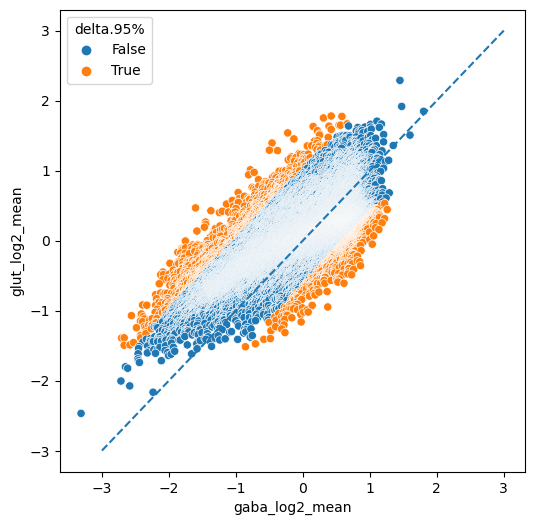

In [19]:
fig, ax=plt.subplots(figsize=(6,6))
sns.scatterplot(x=x, y=y, data=data, hue=hue)
plt.plot([-3,3], [-3,3], ls="--")
ax.set(title ="GABA v GLUT mean l2 activity")

## n tiles in 95%

In [20]:
df.groupby("delta.95%")["delta"].count()

delta.95%
False    33601
True      1770
Name: delta, dtype: int64

<Axes: xlabel='delta', ylabel='Count'>

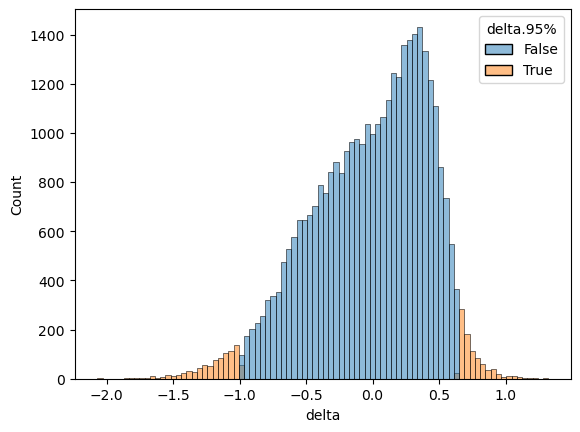

In [21]:
sns.histplot(x="delta", data=data, hue=hue)